# 離散分布と連続分布

In [1]:
from scipy.special import comb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.objects as so

plt.rcParams["font.family"] = "Hiragino Sans"

import pymc as pm
import arviz as az

print(f"Running on PyMC v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.10.0
Running on ArviZ v0.16.1


## 離散分布

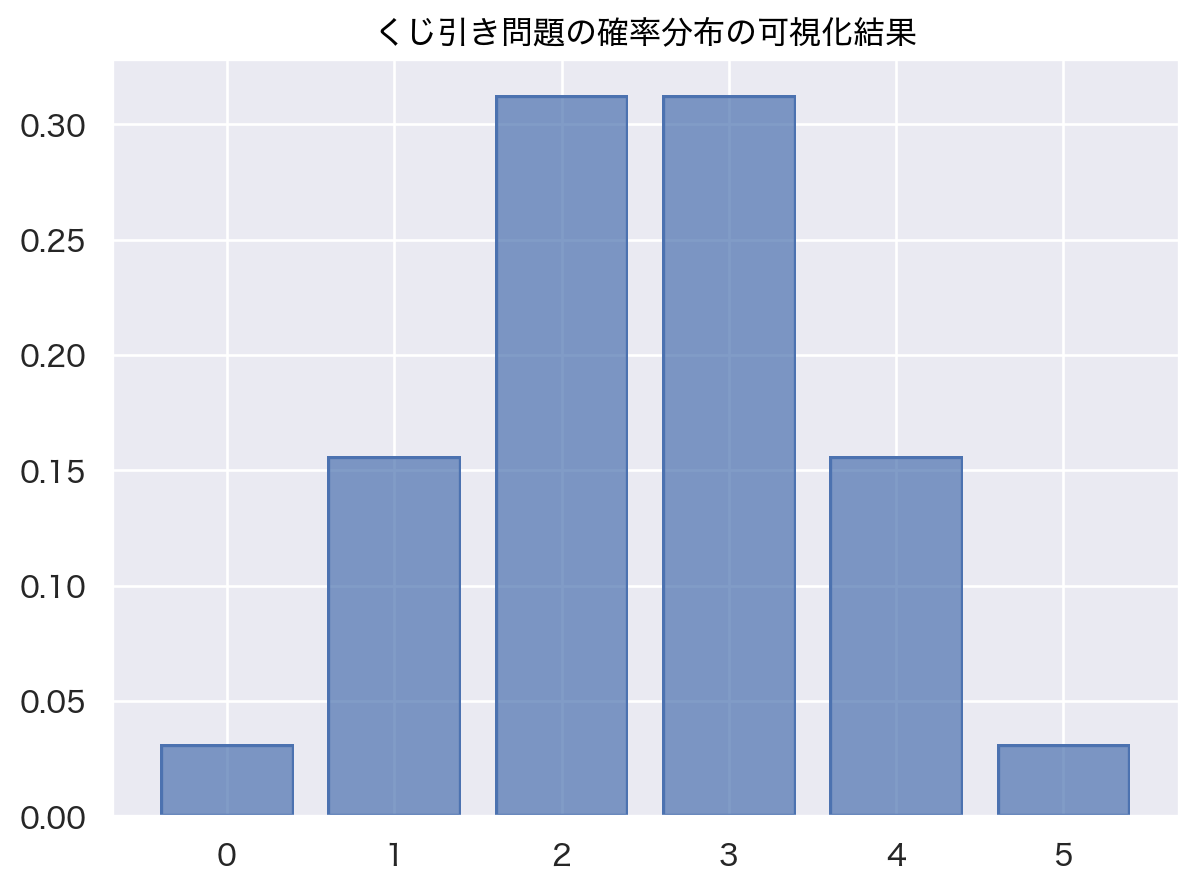

In [2]:
n = 5
x = range(n + 1)
y = [comb(n, i) / 2**n for i in x]

(
    so.Plot(x=x, y=y)
    .add(so.Bar())
    .label(title="くじ引き問題の確率分布の可視化結果")
    .theme({"font.family": "Hiragino Sans"})
)

## 連続分布

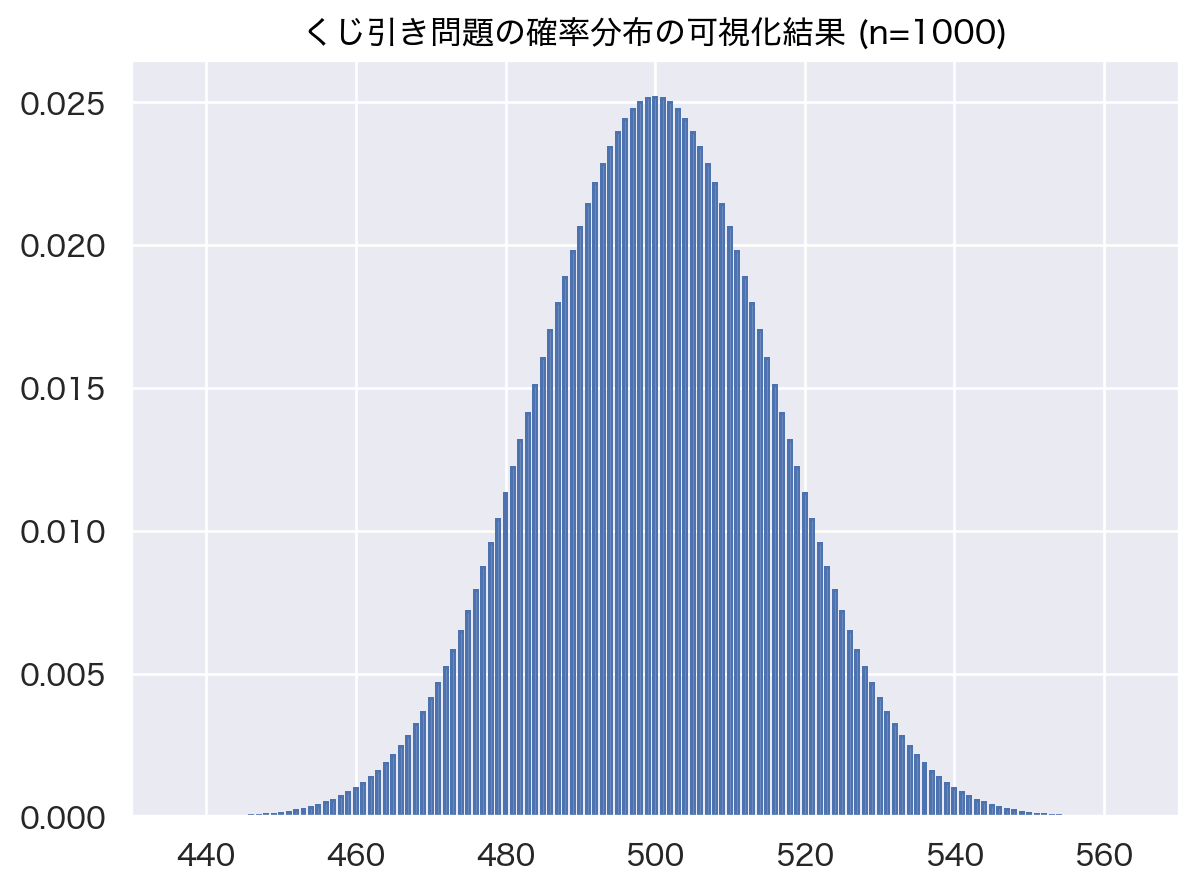

In [3]:
n = 1000
x = range(n + 1)
y = [comb(n, i) / 2**n for i in x]

(
    so.Plot(x=x, y=y)
    .add(so.Bar())
    .limit(x=(430, 570))
    .label(title="くじ引き問題の確率分布の可視化結果 (n=1000)")
    .theme({"font.family": "Hiragino Sans"})
)

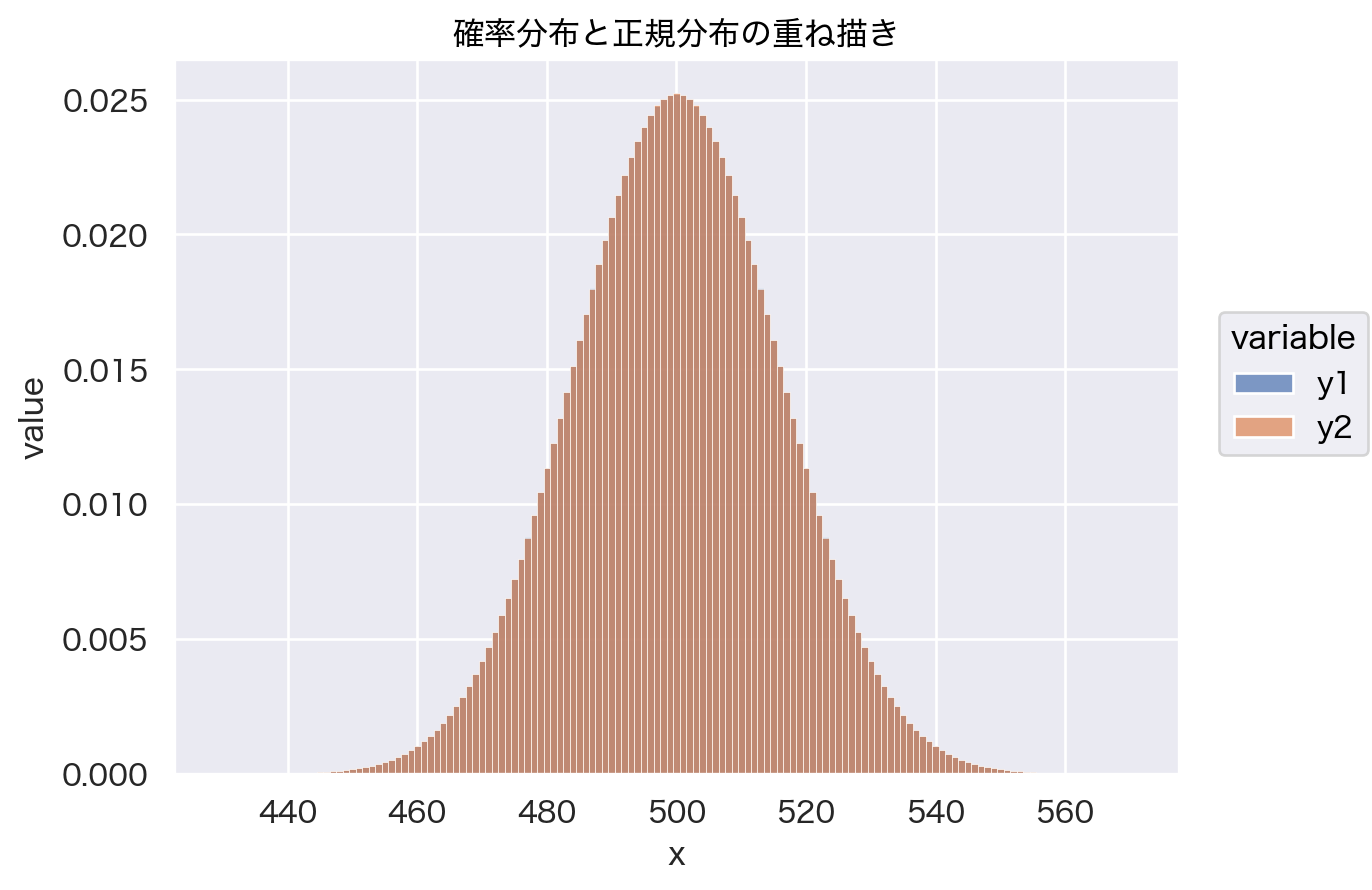

In [4]:
def norm(x, mu, sigma):
    return np.exp(-((x - mu) / sigma) **2 / 2) / (np.sqrt(2 * np.pi) * sigma)

n = 1000
x = np.arange(430, 571)

# 確率分布
y1 = [comb(n, i) / 2**n for i in x]

# 正規分布
mu = n / 2
sigma = np.sqrt(mu / 2)
y2 = norm(x, mu, sigma)

(
    so.Plot(
        data=pd.DataFrame({"x": x, "y1": y1, "y2": y2}).melt(id_vars="x"),
        x="x", y="value",
        color="variable"
    )
    .add(so.Bars())
    .label(title="確率分布と正規分布の重ね描き")
    .theme({"font.family": "Hiragino Sans"})
)

# サンプリング結果解析

In [5]:
with pm.Model() as model:
    x = pm.Binomial("x", p=0.5, n=5)
    prior_samples = pm.sample_prior_predictive(random_seed=42)

Sampling: [x]


## Notebook UI を直接利用

In [6]:
prior_samples

Inference data with groups:
	> prior

## NumPy 形式データを抽出

In [7]:
x_samples = prior_samples["prior"]["x"].to_numpy()
print("type: ", type(x_samples))
print("shape: ", x_samples.shape)
print("values: ", x_samples, "\n")

value_counts = (
    pd.DataFrame(x_samples.reshape(-1))
    .value_counts().sort_index()
)
print(value_counts)

type:  <class 'numpy.ndarray'>
shape:  (1, 500)
values:  [[4 4 4 2 4 1 5 3 1 2 3 1 2 4 2 1 4 0 3 3 1 2 3 4 1 3 1 3 3 3 2 3 1 3 3 3
  0 4 3 1 2 4 3 1 3 3 2 1 1 3 3 2 2 4 4 3 4 3 4 3 5 4 3 2 3 3 3 1 1 2 1 2
  1 1 3 3 2 3 3 4 1 1 3 3 2 2 2 2 3 3 2 2 1 3 2 0 3 4 2 2 2 3 2 4 4 4 1 4
  5 3 1 4 3 3 1 3 3 2 2 3 2 3 3 4 4 1 3 3 4 3 3 4 3 5 3 3 3 2 4 3 3 2 3 3
  3 4 1 4 2 4 3 1 4 4 3 4 2 3 5 2 0 3 2 2 2 3 0 0 2 1 2 4 1 2 3 2 3 3 3 3
  2 1 3 2 2 4 2 3 3 2 2 2 1 3 1 1 3 2 3 1 3 4 3 2 2 2 2 1 2 2 2 4 4 2 2 4
  3 2 3 2 0 3 3 4 3 3 4 2 3 3 2 3 3 1 4 3 1 3 2 4 4 3 4 1 5 2 3 2 2 3 3 4
  2 1 2 4 2 2 3 1 3 3 4 2 2 4 2 2 2 4 2 1 3 2 4 2 2 3 1 2 1 2 1 4 3 5 1 3
  3 2 1 4 2 1 1 2 3 4 2 3 1 3 5 3 2 3 2 2 1 4 3 4 4 3 3 2 2 1 2 2 2 3 4 1
  3 2 3 1 4 2 1 3 3 1 2 3 2 1 1 2 1 2 2 2 2 5 2 2 1 2 4 4 3 3 1 2 5 3 3 2
  4 2 4 2 0 4 2 1 3 2 3 2 1 1 3 1 3 3 2 3 3 2 1 1 1 4 3 3 2 1 2 2 5 2 3 3
  2 1 2 4 2 4 2 2 0 3 2 2 3 1 1 4 3 3 4 4 3 4 1 5 4 3 3 5 3 4 3 3 2 2 3 2
  4 1 1 2 3 3 4 2 2 2 2 3 2 2 4 2 0 2 3 1 2 2 3 4 3 3 3

## ArviZ による分析

In [8]:
summary = az.summary(prior_samples, kind="stats")
display(summary)

,mean,sd,hdi_3%,hdi_97%
x,2.522,1.103,1.0,4.0


Text(0.5, 1.0, 'AriviZ によるサンプル値の可視化結果')

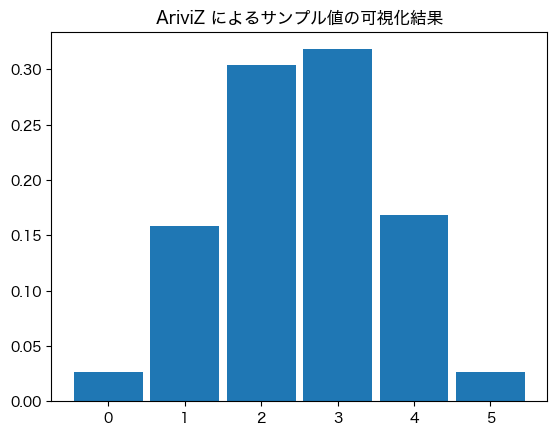

In [9]:
ax = az.plot_dist(x_samples)
ax.set_title("AriviZ によるサンプル値の可視化結果")